In [12]:
import pandas as pd
from datascience import *
import numpy as np
import array
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
test = pd.read_csv('/content/test.csv')
test

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [6]:
smoking_and_age = test[['Maternal Smoker', 'Maternal Age']]
smoking_and_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [7]:
smoking_and_age['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [9]:
smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == True]
smoker


2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [10]:
non_smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1e80be250>,
      dtype=object)

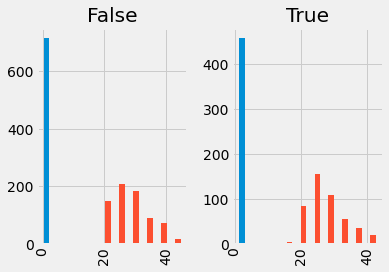

In [11]:
#1

smoking_and_age.hist(by ='Maternal Smoker')

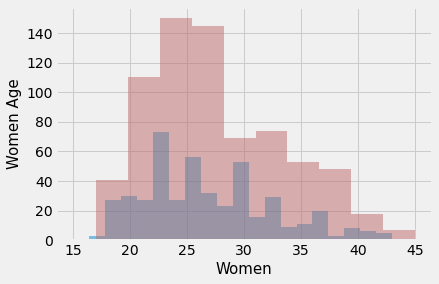

In [29]:
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Women Age',fontsize=15)
plt.show()

2. We will employ A/B testing and decide whether two numerical samples come from the same distribution

3. Null hypothesis: In the population, the distribution of Maternal Age of mothers is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

Alternative hypothesis: In the population, the ages of the mothers who smoke are less, on average, than that of the non-smokers.

4. We use the difference between the two group means as our statistic.

In [14]:
means_table = smoking_and_age.groupby('Maternal Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [15]:
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [18]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

5. Observed statistic = -0.8076725017901509

In [19]:
smoking_and_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [20]:
shuffled = smoking_and_age.sample(1174,replace = False)
shuffled

,Maternal Smoker,Maternal Age
689,True,34
255,False,19
660,False,23
96,True,24
904,False,21
...,...,...
151,False,22
215,False,31
1104,True,34
727,False,24


In [27]:
shuffled_age = shuffled['Maternal Age']
original_and_shuffled= smoking_and_age.assign(shuffled_age=shuffled_age.values )
original_and_shuffled

,Maternal Smoker,Maternal Age,shuffled_age
0,False,27,34
1,False,33,19
2,True,28,23
3,True,23,24
4,False,25,21
...,...,...,...
1169,False,27,22
1170,False,24,31
1171,True,30,34
1172,False,21,24


In [30]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.204196
True,26.736383,27.265795


In [43]:
difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
difference

0.060027118850648264

In [44]:
#6

differences = np.zeros(5000)
for i in np.arange(5000):
    smoking_and_age = test[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_age.sample(1174,replace = False)
    shuffled_age = shuffled['Maternal Age']
    original_and_shuffled = smoking_and_age.assign(shuffled_age=shuffled_age.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
    differences[i] = difference

differences

array([-0.37282021,  0.31043466, -0.12598991, ..., -0.26907994,
        0.19238539,  0.23173515])

In [35]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.335475
1,0.811250
2,-0.379975
3,-0.555260
4,-0.279812
...,...
4995,0.460679
4996,0.449947
4997,-0.032981
4998,-0.301275


Observed Difference: -0.8076725017901509


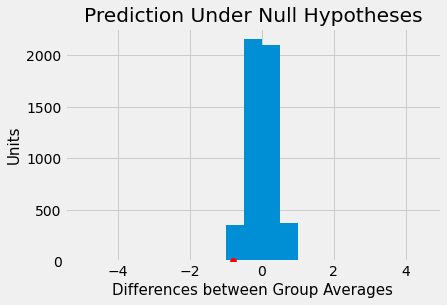

In [41]:
#7

differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.scatter(observed_difference, 0, color='red', s=40, zorder=3)
print('Observed Difference:', observed_difference)



In [42]:
#8 Emperical p value

ep = np.count_nonzero(differences <= observed_difference)/differences.size
ep

0.0094

9. The empirical p-value is around 1% and therefore the result is statistically significant. The test supports the hypothesis that the smokers were younger on average.